### Credit Card Approval Prediction

Problem Statment - A Company wants to automate the Credit Card eligibility process based on customer detail provided while filling online application form & Credit history of customer.

They have given a problem to identify the customers segments which are eligible for Credit Card approval, so that they can specifically target these customers.

Note -
DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday
DAYS_EMPLOYED ---> Count backwards from current day(0). If positive, it means the person currently unemployed.

Note -
MONTHS_BALANCE ---> The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.
STATUS ---> 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

#### Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
app_df = pd.read_csv("application_record.csv")
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
app_df.shape

(438557, 18)

In [4]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
credit_df = pd.read_csv("credit_record.csv") 
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
credit_df.shape

(1048575, 3)

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### Exploratory Data Analysis (EDA)

In [8]:
# For some client ID there are multiple records in credit_df, for example ID 5009744
credit_df.iloc[np.where(credit_df["ID"]==5009744)]

,ID,MONTHS_BALANCE,STATUS
108654,5009744,0,5
108655,5009744,-1,5
108656,5009744,-2,5
108657,5009744,-3,5
108658,5009744,-4,5
108659,5009744,-5,5
108660,5009744,-6,4
108661,5009744,-7,3
108662,5009744,-8,2
108663,5009744,-9,5


In [9]:
# Check for missing values
credit_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [10]:
# Checking values in status column
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [11]:
# categorizing 'STATUS' column to binary classification -  0 : Good Client and 1 : bad client
credit_df['STATUS'].replace(['C', 'X'],0, inplace=True)
credit_df['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [12]:
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

In [13]:
credit_df['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [14]:
credit_df_trans = credit_df.groupby('ID').agg(max).reset_index()
credit_df_trans

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0


In [15]:
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [16]:
credit_df_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

In [17]:
# merging the two datasets based on 'ID'
final_df = pd.merge(app_df, credit_df_trans, how='inner', on='ID')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [18]:
final_df.shape

(36457, 19)

In [19]:
# Checking for missing values
final_df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
STATUS                     0
dtype: int64

In [20]:
## Here we will check the percentage of missing values present in each feature
## 1 -step make the list of features which has missing values
features_with_na = [feature for feature in final_df.columns if final_df[feature].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, 100*np.round(final_df[feature].isnull().mean(), 4),  ' % missing values')

OCCUPATION_TYPE 31.06  % missing values


In [21]:
# list of numerical variables
numerical_features = [feature for feature in final_df.columns if final_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  11


In [22]:
final_df[numerical_features].head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,1
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,1
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,0


In [23]:
## Numerical variables are usually of 2 type
## 1. Continous variable and 
## 2. Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(final_df[feature].unique())<25 and feature not in ['ID']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 7


In [24]:
final_df[discrete_feature].head()

,CNT_CHILDREN,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,0,1,1,0,0,2.0,1
1,0,1,1,0,0,2.0,1
2,0,1,0,0,0,2.0,0
3,0,1,0,1,1,1.0,0
4,0,1,0,1,1,1.0,0


In [25]:
# Checking unique values from Discrete Features

for feature in discrete_feature:
    #print(feature,'\n')
    print(final_df[feature].value_counts())
    print('-----------------------------------------------')

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64
-----------------------------------------------
1    36457
Name: FLAG_MOBIL, dtype: int64
-----------------------------------------------
0    28235
1     8222
Name: FLAG_WORK_PHONE, dtype: int64
-----------------------------------------------
0    25709
1    10748
Name: FLAG_PHONE, dtype: int64
-----------------------------------------------
0    33186
1     3271
Name: FLAG_EMAIL, dtype: int64
-----------------------------------------------
2.0     19463
1.0      6987
3.0      6421
4.0      3106
5.0       397
6.0        58
7.0        19
15.0        3
9.0         2
20.0        1
Name: CNT_FAM_MEMBERS, dtype: int64
-----------------------------------------------
0    32166
1     4291
Name: STATUS, dtype: int64
-----------------------------------------------


In [26]:
# As all the values in column 'FLAG_MOBIL' are 1, hence dropping the column
final_df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [27]:
# Checking record with maximum family members
final_df.iloc[np.where(final_df["CNT_FAM_MEMBERS"]==max(final_df["CNT_FAM_MEMBERS"]))]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
25412,5105054,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,0,Waiters/barmen staff,20.0,0


In [28]:
# Checking record with 15 and 20 family members
final_df.loc[final_df['CNT_FAM_MEMBERS'].isin([15, 20]),['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']]

,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_FAMILY_STATUS
14671,14,15.0,Separated
14672,14,15.0,Separated
14673,14,15.0,Separated
25412,19,20.0,Single / not married


In [29]:
# Categorical Variables
categorical_features=[feature for feature in final_df.columns if final_df[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

Number of categorical variables:  8


In [30]:
# Replace missing value in OCCUPATION_TYPE with a new label 'Unknown'
def replace_cat_feature(dataset,features_nan):
    data = dataset.copy()
    data[features_nan] = data[features_nan].fillna('Unknown')
    return data

final_df = replace_cat_feature(final_df, features_with_na)

for feature in features_with_na:
    print(feature, 100*np.round(final_df[feature].isnull().mean(), 4),  ' % missing values')

OCCUPATION_TYPE 0.0  % missing values


In [31]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(final_df[feature].value_counts())
    print('-----------------------------------------------')

F    24430
M    12027
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STA

In [32]:
#Cleaning up categorical values to lower the count of dummy variables.
housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}
              
income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}
education_type = {'Secondary / secondary special':'Secondary',
                     'Lower secondary':'Secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}
family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}
final_df['NAME_HOUSING_TYPE'] = final_df['NAME_HOUSING_TYPE'].map(housing_type)
final_df['NAME_INCOME_TYPE'] = final_df['NAME_INCOME_TYPE'].map(income_type)
final_df['NAME_EDUCATION_TYPE'] = final_df['NAME_EDUCATION_TYPE'].map(education_type)
final_df['NAME_FAMILY_STATUS'] = final_df['NAME_FAMILY_STATUS'].map(family_status)

In [33]:
for feature in categorical_features:
    #print(feature,'\n')
    print(final_df[feature].value_counts())
    print('-----------------------------------------------')

F    24430
M    12027
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
Working      30294
Pensioner     6152
Student         11
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
Secondary           25151
Higher education    11274
Academic degree        32
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
Married    27993
Single      8464
Name: NAME_FAMILY_STATUS, dtype: int64
-----------------------------------------------
House / apartment    34681
With parents          1776
Name: NAME_HOUSING_TYPE, dtype: int64
-----------------------------------------------
Unknown                  11323
Laborers                  6211
Core staff                3591
Sales staff               3

In [34]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', final_df['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', final_df['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25152 
Max DAYS_BIRTH : -7489


In [35]:
# Converting 'DAYS_BIRTH' values from Day to Years
final_df['DAYS_BIRTH'] = round(final_df['DAYS_BIRTH']/-365,0)
final_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [36]:
# Checking unique values greater than 0
final_df[final_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [37]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
final_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [38]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
final_df['DAYS_EMPLOYED'] = abs(round(final_df['DAYS_EMPLOYED']/-365,0))
final_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

In [39]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
final_df.drop('ID', axis=1, inplace=True)

In [40]:
# checking if there are still duplicate rows in Final Dataframe
len(final_df) - len(final_df.drop_duplicates())

25309

In [41]:
# Dropping duplicate records
final_df = final_df.drop_duplicates()
final_df.reset_index(drop=True ,inplace=True)

In [42]:
final_df.shape

(11148, 17)

In [43]:
final_df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [44]:
final_df['STATUS'].value_counts(normalize=True)*100

0    78.543236
1    21.456764
Name: STATUS, dtype: float64

### Visualization

In [45]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Married,House / apartment,33.0,12.0,1,0,0,Unknown,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,59.0,3.0,0,0,0,Security staff,2.0,0
2,F,N,Y,0,270000.0,Working,Secondary,Single,House / apartment,52.0,8.0,0,1,1,Sales staff,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Single,House / apartment,62.0,0.0,0,0,0,Unknown,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,1,1,1,Accountants,2.0,0


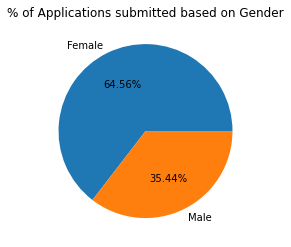

In [46]:
# This graph shows that, majority of application are submitted by Female's
plt.pie(final_df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

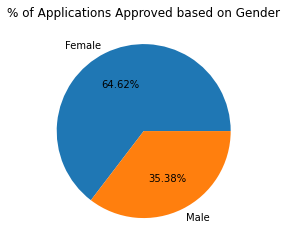

In [47]:
# This graph shows that, majority of application are approved for Female's
plt.pie(final_df[final_df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

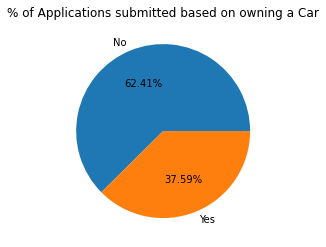

In [48]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(final_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

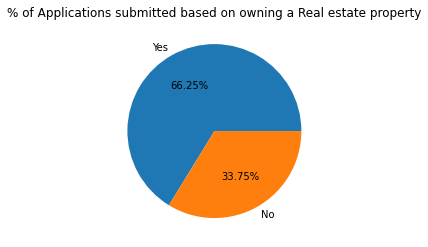

In [49]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(final_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

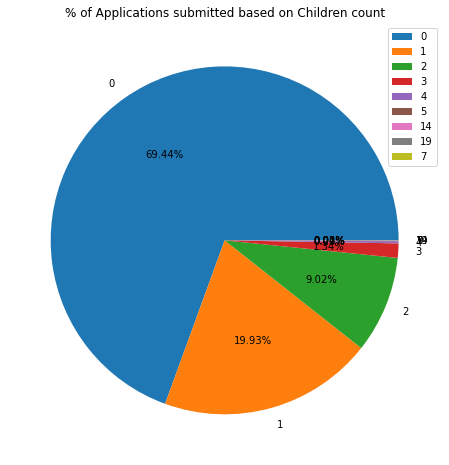

In [50]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_df['CNT_CHILDREN'].value_counts(), labels=final_df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

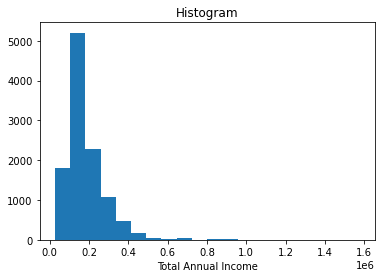

In [51]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 lakh
plt.hist(final_df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

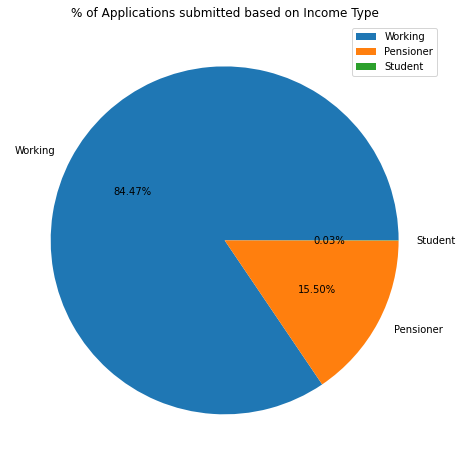

In [52]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(final_df['NAME_INCOME_TYPE'].value_counts(), labels=final_df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

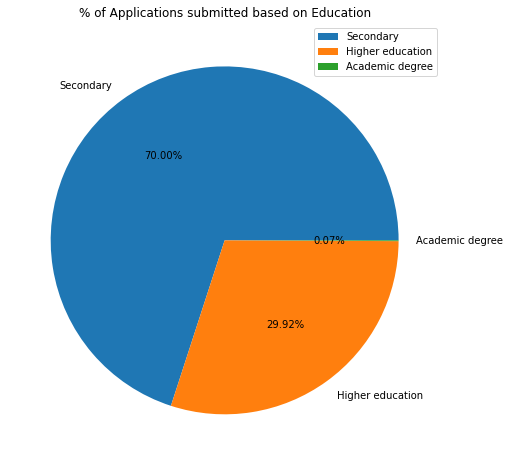

In [53]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(final_df['NAME_EDUCATION_TYPE'].value_counts(), labels=final_df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


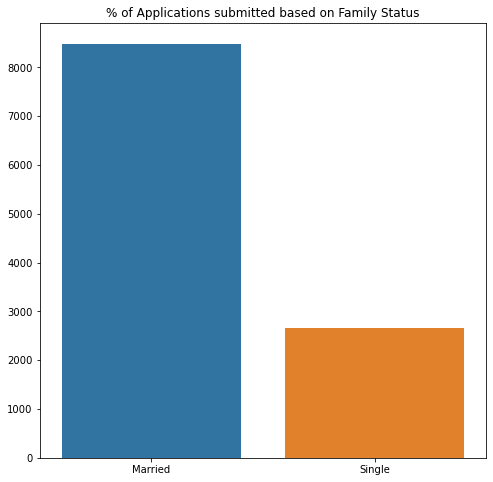

In [54]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(8,8))
sns.barplot(final_df['NAME_FAMILY_STATUS'].value_counts().index, final_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


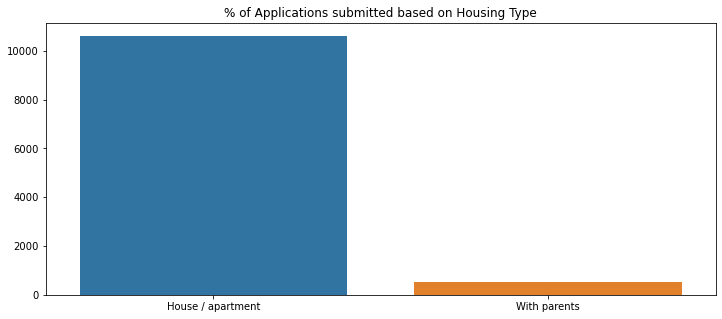

In [55]:
# This graph shows that, majority of applicatant's lives in House / Apartment
plt.figure(figsize=(12,5))
sns.barplot(final_df['NAME_HOUSING_TYPE'].value_counts().index, final_df['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()

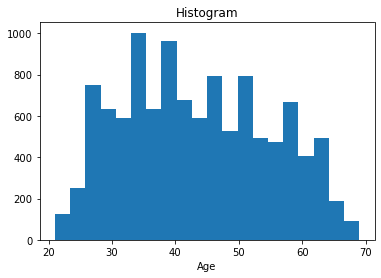

In [56]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(final_df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

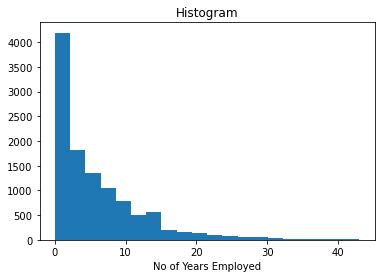

In [57]:
# This graph shows that, majority of applicatant's are Employed for 0 to 7 years
plt.hist(final_df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


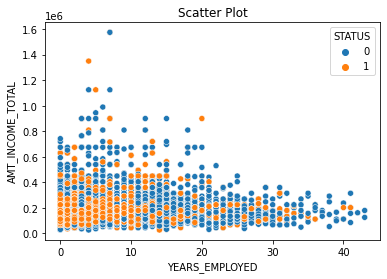

In [58]:
# This graph shows that, majority of applications are rejected if Total income & years of Employment is less
sns.scatterplot(final_df['YEARS_EMPLOYED'], final_df['AMT_INCOME_TOTAL'], hue=final_df['STATUS'])
plt.title('Scatter Plot')
plt.show()

In [59]:
final_df.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
CNT_CHILDREN,1.000000,0.029202,-0.308812,0.029084,0.042005,-0.025712,0.003860,0.893555,0.005952
AMT_INCOME_TOTAL,0.029202,1.000000,-0.051488,0.077668,-0.038297,0.018557,0.086504,0.024056,0.024840
AGE_YEARS,-0.308812,-0.051488,1.000000,0.019175,-0.162571,0.047847,-0.104028,-0.263880,-0.023276
YEARS_EMPLOYED,0.029084,0.077668,0.019175,1.000000,0.100901,0.038644,-0.011422,0.047762,0.000208
FLAG_WORK_PHONE,0.042005,-0.038297,-0.162571,0.100901,1.000000,0.291464,-0.048620,0.053823,-0.002320
FLAG_PHONE,-0.025712,0.018557,0.047847,0.038644,0.291464,1.000000,0.002080,-0.015703,-0.004155
FLAG_EMAIL,0.003860,0.086504,-0.104028,-0.011422,-0.048620,0.002080,1.000000,-0.002530,0.014501
CNT_FAM_MEMBERS,0.893555,0.024056,-0.263880,0.047762,0.053823,-0.015703,-0.002530,1.000000,0.004590
STATUS,0.005952,0.024840,-0.023276,0.000208,-0.002320,-0.004155,0.014501,0.004590,1.000000


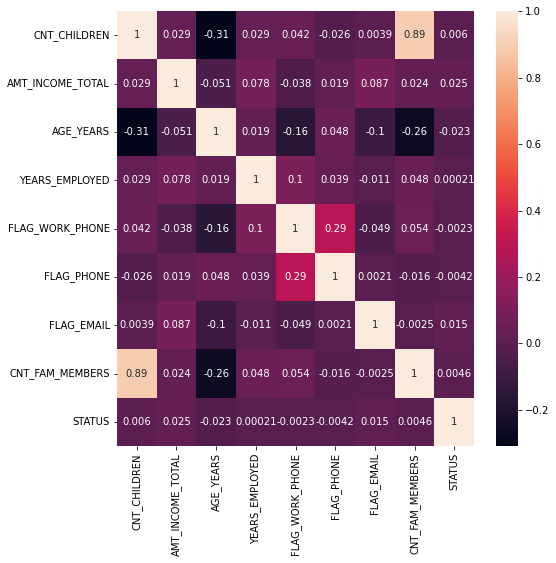

In [60]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (8,8))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

In [61]:
final_df.to_csv('final_df.csv', index=False)